In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [44]:
df = pd.read_csv('data/sample_5000rows_spacy_textblob.csv')

In [45]:
df.head()

,Unnamed: 0,pub_type,position_section,position_subsection,hl1,hl2,author,lede,body,language,...,indexing_terms,entities,entity_context,entity_sentiments_scoreonly,most_negative_score,most_positive_score,average_score,most_negative_sentiment,most_positive_sentiment,average_sentiment
0,0,"Newspaper, Newspapers",SPORTS,NaN,Team up in air on Canada's pot issue,NaN,NaN,"calgary, alberta — some bruins rely on plant-b...",body while now legal in 13 nhl cities — seven ...,['ENGLISH'],...,"{'subject': [{'score': '92', 'classCode': 'STX...","[('calgary', 'GPE'), ('alberta', 'GPE'), ('bru...","[('calgary', 'GPE', 'calgary, alberta — some b...","[0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0]",0.00,0.500000,0.071429,Neutral,Positive,Neutral
1,1,"Newspaper, Newspapers",NEWS,National,Treasury worker is charged with leaks,NaN,NaN,washington — a senior treasury department empl...,body the charges reflect the latest move in th...,['ENGLISH'],...,"{'legal': [{'className': 'Banking Law', 'class...","[('washington', 'GPE'), ('wednesday', 'DATE'),...","[('washington', 'GPE', 'washington — a senior ...","[0.0, 0.0, 0.17857142857142858]",0.00,0.178571,0.059524,Neutral,Positive,Neutral
2,2,"Newspaper, Newspapers",LIVING ARTS,NaN,"Funny Women luncheon raises record $950,000 fo...",NaN,NaN,edwidge danticat spoke at the luncheon to bene...,body at tuesday's funny women . . . serious bu...,['ENGLISH'],...,"{'subject': [{'score': '90', 'classCode': 'STX...",[],[],[],inf,inf,inf,Positive,Positive,Positive
3,3,"Newspaper, Newspapers",NEWS,Foreign,Turkish officials say audio reveals torture,NaN,NaN,istanbul — his killers were waiting when jamal...,"body khashoggi was dead within minutes, and wi...",['ENGLISH'],...,"{'subject': [{'score': '92', 'classCode': 'N92...","[('khashoggi', 'GPE'), ('saudi', 'NORP'), ('is...","[('khashoggi', 'GPE', 'killers were waiting wh...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.00,0.000000,0.000000,Neutral,Neutral,Neutral
4,4,"Newspaper, Newspapers",NEWS,Metro,N.E. Journal pulls stem cell researcher's paper,Concern espressed about 2 other articles,NaN,the new england journal of medicine on wednesd...,body anversa directed a lab at the brigham fro...,['ENGLISH'],...,"{'subject': [{'score': '90', 'classCode': 'ST0...","[('the new england journal of medicine', 'ORG'...","[('the new england journal of medicine', 'ORG'...","[0.13636363636363635, 0.0, 0.0, 0.0, -0.05, 0....",-0.05,0.136364,0.008636,Neutral,Positive,Neutral


In [46]:
# drop inf values
df['average_score'].replace(np.inf, np.nan, inplace=True)
df.dropna(subset=['average_score'], inplace=True)

/var/folders/qp/_cz8x4hj1730r0wn6pht12dr0000gn/T/ipykernel_49620/3339720726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_score'].replace(np.inf, np.nan, inplace=True)


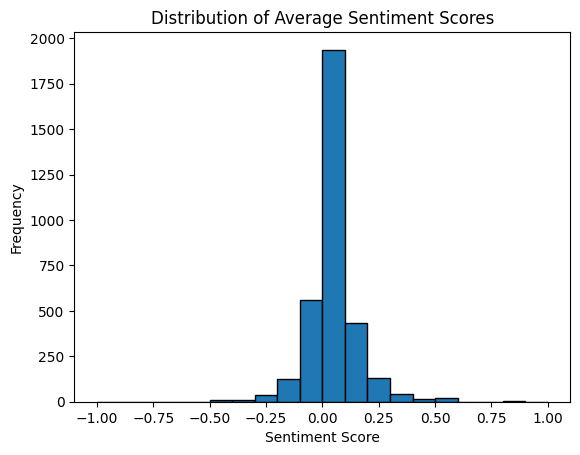

In [47]:
plt.hist(df['average_score'], bins=20, edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Average Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [48]:
category_counts = df['average_sentiment'].value_counts()
category_counts

average_sentiment
Neutral     2468
Positive     673
Negative     171
Name: count, dtype: int64

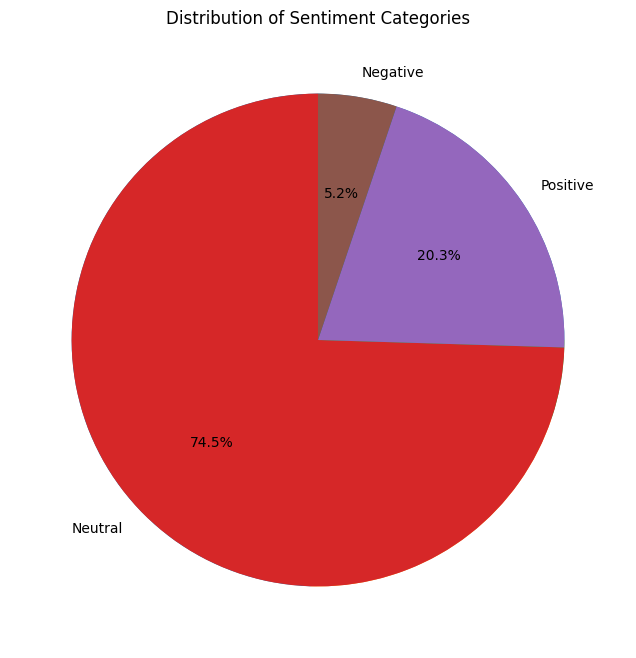

In [54]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.title('Distribution of Sentiment Categories')
plt.pie(category_counts)
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()